<a href="https://colab.research.google.com/github/LLFELIPEVV/Machine-Learning-with-Python-IBM/blob/main/Laboratorio_regresion_lineal_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Instalación de librerías
### Explicación:
En esta sección instalamos las librerías necesarias para el análisis: NumPy, Pandas, Scikit-Learn y Matplotlib.

**Nota:** En Colab generalmente ya vienen instaladas versiones compatibles, pero se incluyen estos comandos para asegurarse.

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

## 2. Importar librerías y configuración inicial
### Explicación:
Aquí importamos las librerías que utilizaremos en el proyecto y configuramos Matplotlib para que los gráficos se muestren directamente en el notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 3. Cargar y visualizar los datos
### Explicación:
Se descarga el dataset de consumo de combustible y emisiones de CO₂ desde una URL. Luego se muestran 5 registros al azar para verificar que se cargó correctamente.

In [3]:
# Definir la URL del dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

# Cargar el dataset usando Pandas
df = pd.read_csv(url)

# Mostrar 5 registros aleatorios para ver el contenido
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
983,2014,TOYOTA,HIGHLANDER,SUV - SMALL,3.5,6,AS6,X,12.6,9.4,11.2,25,258
789,2014,MINI,COOPER PACEMAN,COMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179
770,2014,MERCEDES-BENZ,SL 550,TWO-SEATER,4.7,8,AS7,Z,13.4,9.6,11.7,24,269
171,2014,CADILLAC,CTS SPORT WAGON AWD,STATION WAGON - SMALL,3.0,6,AS6,X,12.8,9.1,11.1,25,255
93,2014,BMW,428i xDRIVE COUPE,COMPACT,2.0,4,A8,Z,10.6,7.2,9.1,31,209


## 4. Exploración y selección de características
### Explicación:
Primero se muestran estadísticas descriptivas de los datos para conocer su distribución. Luego se eliminan las columnas que no son útiles (datos categóricos o repetitivos) y se muestran las columnas que usaremos para el modelo.

In [4]:
# Mostrar resumen estadístico de los datos
df.describe()

# Eliminar columnas no numéricas o sin relevancia para este ejemplo.
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)

# Mostrar las primeras 9 filas del DataFrame resultante
df.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
5,3.5,6,11.9,7.7,10.0,28,230
6,3.5,6,11.8,8.1,10.1,28,232
7,3.7,6,12.8,9.0,11.1,25,255
8,3.7,6,13.4,9.5,11.6,24,267


## 5. Análisis de correlación
### Explicación:
Se calcula la matriz de correlación para observar las relaciones entre las variables. Esto ayuda a decidir qué variables conservar y cuáles eliminar si están muy correlacionadas entre sí.

In [5]:
# Calcular y mostrar la matriz de correlación
df.corr()

# En este caso, se observa que:
# - 'ENGINESIZE' y 'CYLINDERS' están muy correlacionados, y 'ENGINESIZE' tiene mejor correlación con CO2EMISSIONS.
# - Entre las variables de consumo de combustible, se conserva 'FUELCONSUMPTION_COMB_MPG'
#   (suponiendo que ese es el nombre de la columna en el dataset) y se eliminan las otras.
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis=1)

# Visualizar las primeras filas nuevamente
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


## 6. Visualización de relaciones entre variables
### Explicación:
Usaremos un "scatter matrix" (matriz de dispersión) para visualizar cómo se relacionan las variables entre sí. Esto es útil para identificar si existen relaciones lineales y ver la distribución de cada variable.

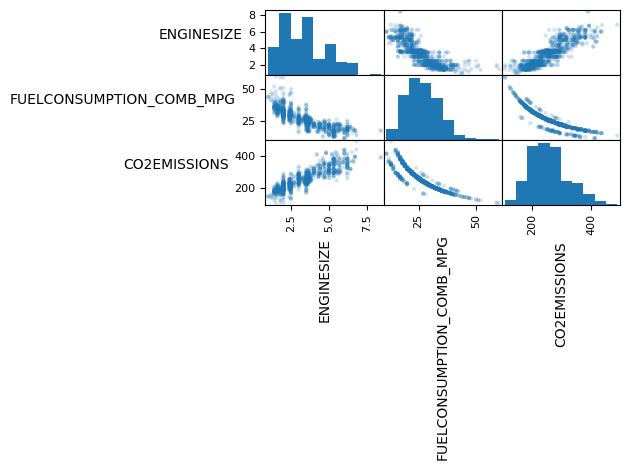

In [6]:
# Crear una matriz de dispersión para ver las relaciones entre las variables
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# Rotar las etiquetas para que sean legibles
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

**Comentario:**
Se observa que algunas relaciones (como entre 'FUELCONSUMPTION_COMB_MPG' y 'CO2EMISSIONS') pueden no ser perfectamente lineales; pero para el ejemplo seguiremos con el modelado.

## 7. Extracción de variables de entrada y etiquetas
### Explicación:
Seleccionamos las columnas que utilizaremos para predecir las emisiones de CO₂. En este ejemplo, tomamos las dos primeras columnas del DataFrame (por ejemplo, 'ENGINESIZE' y 'FUELCONSUMPTION_COMB_MPG') como variables de entrada, y la tercera columna ('CO2EMISSIONS') como la salida.

In [7]:
# Extraer las dos primeras columnas como variables de entrada y la tercera como etiqueta (salida)
X = df.iloc[:, [0, 1]].to_numpy()
y = df.iloc[:, [2]].to_numpy()

## 8. Preprocesamiento: Estándarización de los datos
### Explicación:
Se normalizan los datos para que todas las variables tengan la misma escala, lo que ayuda al algoritmo de regresión.

In [8]:
from sklearn import preprocessing

# Crear un objeto para estandarizar
std_scaler = preprocessing.StandardScaler()

# Transformar los datos de entrada
X_std = std_scaler.fit_transform(X)

# Mostrar estadísticas de los datos estandarizados para verificar: la media debe ser 0 y la desviación 1
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


## 9. División del dataset en entrenamiento y prueba
### Explicación:
Dividimos los datos en dos conjuntos: uno para entrenar el modelo (80% de los datos) y otro para evaluarlo (20% restante).

In [9]:
from sklearn.model_selection import train_test_split

# Dividir los datos de forma aleatoria
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

## 10. Construcción y entrenamiento del modelo de regresión múltiple
### Explicación:
Creamos el modelo de regresión múltiple usando Scikit-Learn, lo entrenamos con los datos de entrenamiento y mostramos los coeficientes obtenidos.

In [10]:
from sklearn import linear_model

# Crear el objeto del modelo
regressor = linear_model.LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regressor.fit(X_train, y_train)

# Obtener los coeficientes y el intercepto (ordenada al origen)
coef_ = regressor.coef_
intercept_ = regressor.intercept_

print('Coefficients:', coef_)
print('Intercept:', intercept_)

Coefficients: [[ 25.27339614 -37.4381472 ]]
Intercept: [256.29072488]


**Comentario:**
Los coeficientes y el intercepto definen el "hiperplano" que mejor se ajusta a los datos. Como usamos dos variables, nuestro modelo es un plano en un espacio de 3 dimensiones.

## 11. Transformar parámetros a la escala original
### Explicación:
Si queremos interpretar los coeficientes en las unidades originales, debemos revertir la estandarización utilizando la media y la desviación estándar calculadas.

In [11]:
# Obtener la media y la desviación estándar de los datos originales
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# Calcular los coeficientes en la escala original
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print('Coefficients (original scale):', coef_original)
print('Intercept (original scale):', intercept_original)

Coefficients (original scale): [[17.8581369  -5.01502179]]
Intercept (original scale): [329.1363967]


## 12. Visualización de los resultados en 3D
### Explicación:
Se crea un gráfico 3D para visualizar los datos y el plano de regresión. Debido a que interpretar gráficos 3D puede ser complejo, también se muestran gráficas de "rebanadas" (slice plots) para cada variable.

***Importante:*** *La visualización 3D ayuda a ver el ajuste del plano, pero puede resultar difícil de interpretar para principiantes.*

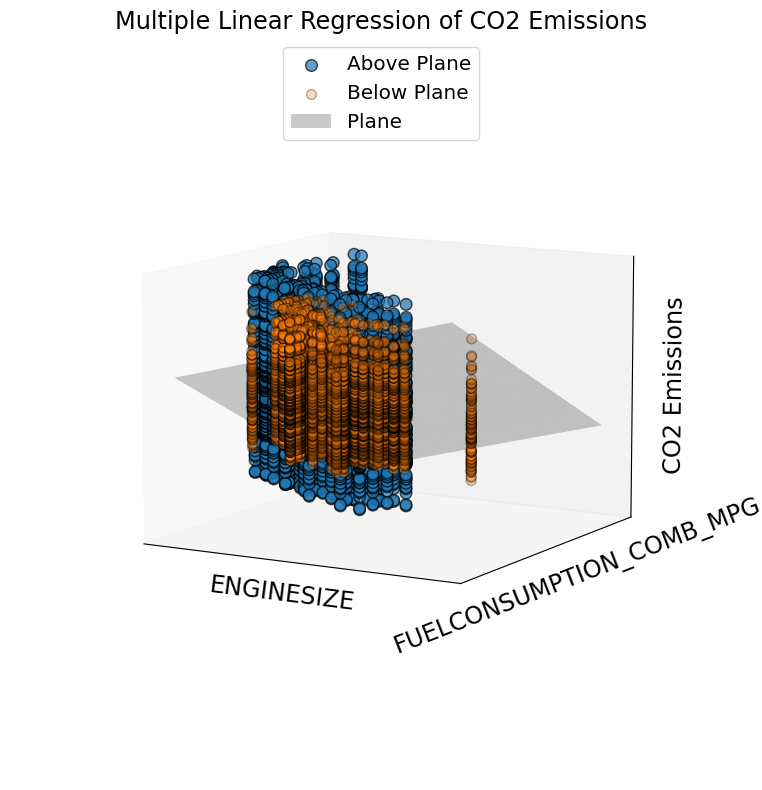

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Preparar datos para la gráfica 3D usando el conjunto de prueba
X1 = X_test[:, 0]  # primera variable (por ejemplo, ENGINESIZE)
X2 = X_test[:, 1]  # segunda variable (por ejemplo, FUELCONSUMPTION_COMB_MPG)

# Crear malla para la superficie del plano de regresión
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))

# Calcular los valores del plano usando los coeficientes del modelo
y_surf = intercept_ + coef_[0, 0] * x1_surf + coef_[0, 1] * x2_surf

# Calcular predicciones en el conjunto de prueba para diferenciar los puntos
y_pred = regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:, 0]
below_plane = below_plane[:, 0]

# Graficar en 3D
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Puntos: separamos los que están por encima y por debajo del plano
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane], label="Above Plane", s=70, alpha=0.7, ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane], label="Below Plane", s=50, alpha=0.3, ec='k')

# Dibujar la superficie del plano de regresión
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21, label='Plane')

ax.view_init(elev=10)
ax.legend(fontsize='x-large', loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION_COMB_MPG', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

## 13. Visualización en 2D: Rebanadas del plano
### Explicación:
Para simplificar la interpretación, se realizan dos gráficos 2D que muestran la relación de cada variable por separado con las emisiones de CO₂, utilizando la línea de regresión correspondiente.

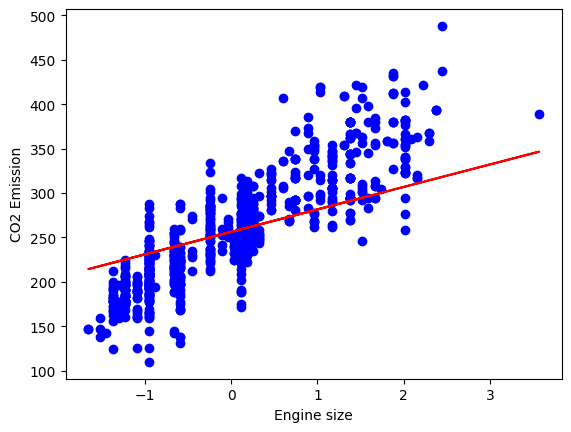

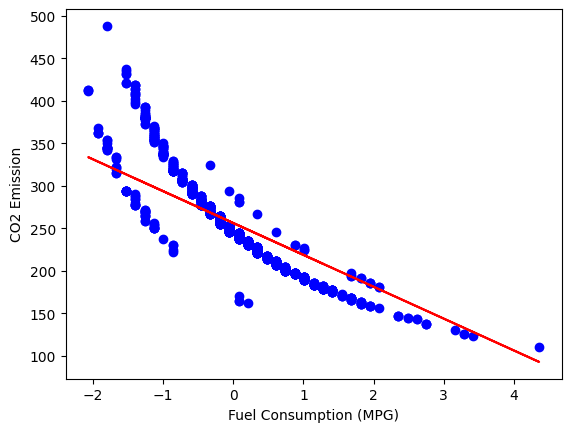

In [13]:
# Visualización para la primera variable (por ejemplo, ENGINESIZE)
plt.scatter(X_train[:, 0], y_train, color='blue')
plt.plot(X_train[:, 0], coef_[0, 0] * X_train[:, 0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

# Visualización para la segunda variable (por ejemplo, FUELCONSUMPTION_COMB_MPG)
plt.scatter(X_train[:, 1], y_train, color='blue')
plt.plot(X_train[:, 1], coef_[0, 1] * X_train[:, 1] + intercept_[0], '-r')
plt.xlabel("Fuel Consumption (MPG)")
plt.ylabel("CO2 Emission")
plt.show()

**Comentario:**
Estos gráficos muestran cómo el modelo trata de ajustar una línea (regresión simple) para cada variable por separado, aunque el modelo completo es múltiple. En este ejemplo se evidencia que el ajuste del plano completo puede no ser óptimo si la relación entre variables y la emisión de CO₂ es más compleja.

## 14. Ejercicios prácticos
### Ejercicio 1:
Determinar y mostrar los parámetros para la regresión lineal de CO₂ respecto a ENGINESIZE (tomando solo esa variable).

***Pista:*** *Usa la técnica de regresión simple.*

In [14]:
# EXTRAER la columna de ENGINESIZE de los datos de entrenamiento
X_train_1 = X_train[:, 0].reshape(-1, 1)  # convertir a 2D

# Crear y entrenar el modelo de regresión lineal simple
regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1, y_train)

# Obtener coeficiente e intercepto
coef_1 = regressor_1.coef_
intercept_1 = regressor_1.intercept_

print('Coefficients:', coef_1)
print('Intercept:', intercept_1)

Coefficients: [[55.18408797]]
Intercept: [256.77183014]


### Ejercicio 2:
Crear un gráfico de dispersión de CO₂ frente a ENGINESIZE (datos de entrenamiento) y superponer la línea de regresión.

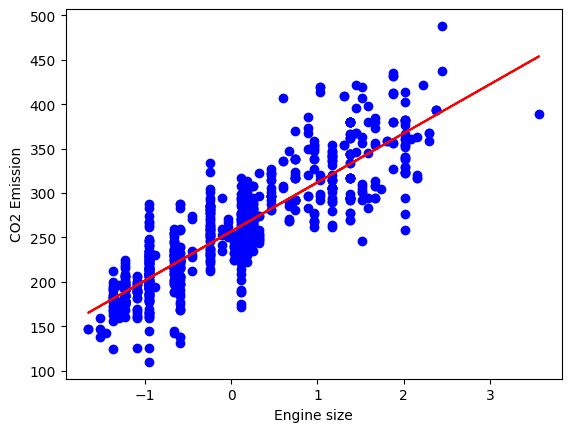

In [15]:
# Gráfico de entrenamiento: CO2 vs ENGINESIZE
plt.scatter(X_train_1, y_train, color='blue')
plt.plot(X_train_1, regressor_1.predict(X_train_1), '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

### Ejercicio 3:
Crear el mismo gráfico pero usando el conjunto de datos de prueba, para comparar el desempeño en datos no vistos.

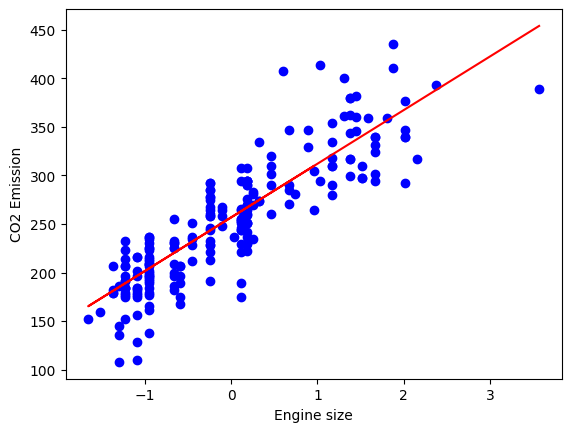

In [16]:
# Extraer ENGINESIZE del conjunto de prueba
X_test_1 = X_test[:, 0].reshape(-1, 1)

plt.scatter(X_test_1, y_test, color='blue')
plt.plot(X_test_1, regressor_1.predict(X_test_1), '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

### Ejercicio 4:
Realizar un modelo de regresión simple usando FUELCONSUMPTION_COMB_MPG como variable independiente e imprimir los coeficientes.

In [17]:
# Extraer FUELCONSUMPTION_COMB_MPG de los datos de entrenamiento
X_train_2 = X_train[:, 1].reshape(-1, 1)

# Crear y entrenar el modelo
regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2, y_train)

# Mostrar parámetros del modelo
print('Coefficients (Fuel Consumption):', regressor_2.coef_)
print('Intercept (Fuel Consumption):', regressor_2.intercept_)

Coefficients (Fuel Consumption): [[-58.51827989]]
Intercept (Fuel Consumption): [256.09392179]


### Ejercicio 5:
Generar un gráfico de dispersión para el conjunto de prueba usando FUELCONSUMPTION_COMB_MPG y la línea de regresión.

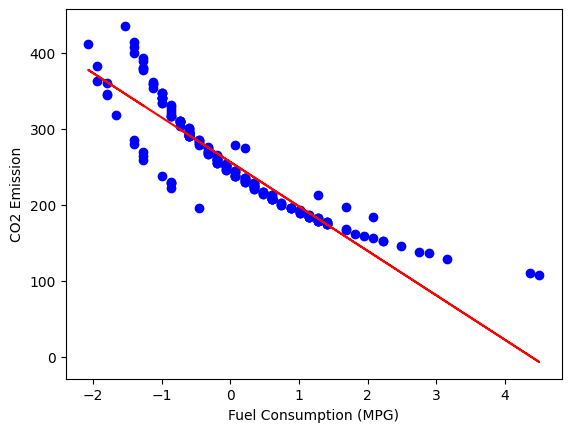

In [18]:
# Extraer FUELCONSUMPTION_COMB_MPG del conjunto de prueba
X_test_2 = X_test[:, 1].reshape(-1, 1)

plt.scatter(X_test_2, y_test, color='blue')
plt.plot(X_test_2, regressor_2.predict(X_test_2), '-r')
plt.xlabel("Fuel Consumption (MPG)")
plt.ylabel("CO2 Emission")
plt.show()